In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Optional

def visualize_outputs_and_targets(
    targets: pd.DataFrame,
    plots_dir: Path,
    file_name: str = "test.png",
    return_fig: bool = False,
    channel_labels: Optional[list[str]] = None,
    predictions: Optional[pd.DataFrame] = None,
    selected_channels: Optional[list[int]] = None,
) -> plt.Figure | None:

    # Determine which channels to plot
    n_channels: int = targets.shape[-1]
    if selected_channels is None:
        selected_channels = list(range(n_channels))

    if channel_labels is None:
        channel_labels = [f"Channel {i}" for i in range(n_channels)]

    # Create subplots for only the selected channels
    fig, _ = plt.subplots(
        ncols=1,
        nrows=len(selected_channels),
        figsize=(10, 2 * len(selected_channels)),
        sharex=True,
        squeeze=False,
    )

    for i, (ax, channel) in enumerate(zip(fig.axes, selected_channels)):
        target_series = targets.iloc[:, channel]
        y_min = target_series.min() - 5
        y_max = target_series.max() + 10
        # Plot target in orange
        sns.lineplot(
            data=targets.iloc[:, channel],
            ax=ax,
            linewidth=0.7,
            label="Target",
            color=(1.0, 0.498, 0.055),
            alpha=0.8 if predictions is not None else 1.0,
        )

        # Plot prediction in blue if provided
        if predictions is not None:
            sns.lineplot(
                data=predictions.iloc[:, channel],
                ax=ax,
                linewidth=0.7,
                label="Prediction",
                color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
                alpha=0.8,
            )

        # Labels and formatting
        ax.set_ylabel(channel_labels[channel], fontsize=12)
        ax.set_ylim(-5, y_max + 10)
        ax.tick_params(axis='both', labelsize=10)
        ax.set_xlim(-100, len(targets) + 100)
        ax.grid(True)

        # Legend: only on first subplot if predictions are provided
        if predictions is not None and i == 0:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(
                handles=handles,
                labels=labels,
                loc="upper right",
                fontsize=10,
                ncol=2,
            )
        else:
            ax.get_legend().remove()

    fig.supylabel("Firing rate [Hz]", fontsize=14)
    fig.supxlabel("Time step", fontsize=14)

    fig.tight_layout()
    fig.savefig(plots_dir / file_name, dpi=300)

    if return_fig:
        return fig
    return None


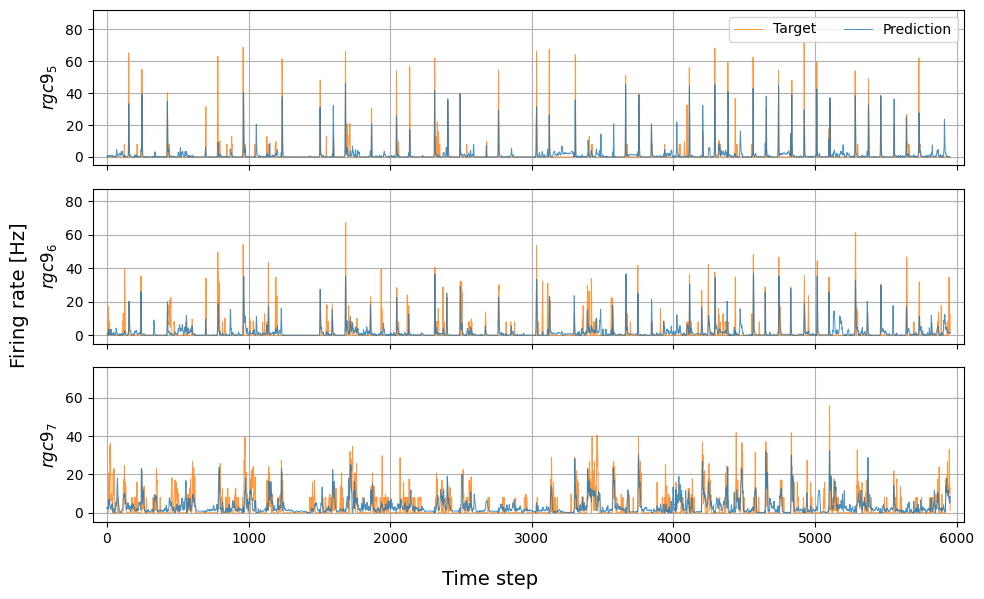

In [14]:
# csv_dir = Path("predictions")
# model_name = "3D"

# targets = pd.read_csv(csv_dir / model_name / "unscaled_targets.csv")
# predictions = pd.read_csv(csv_dir / model_name / "unscaled_outputs.csv")
targets = pd.read_csv("samples/unscaled_targets_9.csv", sep=",")
predictions = pd.read_csv("samples/EXP_REG_SimpleLTC_40_mse_9_STEP_1_RUN_2.csv", sep=",")

num_channels = 9 # 9, 14, 27
dataset_name = "rgc"
selected_channels = [4, 5,6]

visualize_outputs_and_targets(
    targets=targets,
    plots_dir=Path("plots"),
    file_name="LTC_9_3-6-7.pdf",
    return_fig=False,
    selected_channels=selected_channels,  # Example of selecting specific channels
    channel_labels=[f"${dataset_name}{num_channels}_{{{c+1}}}$" for c in range(num_channels)],
    predictions=predictions
)

## Comparison plot - single channel

In [13]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [43]:
def visualize_model_predictions_comparison(
    targets: pd.DataFrame,
    predictions_list: list[pd.DataFrame],
    model_names: list[str],
    plots_dir: Path,
    file_name: str = "comparison.png",
    return_fig: bool = False,
    selected_channels: Optional[list[int]] = None,
) -> plt.Figure | None:

    # Validate inputs
    if len(predictions_list) != len(model_names):
        raise ValueError("Length of predictions_list must match length of model_names")

    n_channels = targets.shape[-1]
    if selected_channels is None:
        selected_channels = list(range(n_channels))

    # Colors for model predictions
    # palette = sns.color_palette("tab10")
    palette = [(184, 0, 88), (0, 140, 249), (0, 110, 0), (178, 69, 2), (255, 146, 135), (89, 84, 214), (0, 198, 248), (135, 133, 0), (0, 167, 108), (189, 189, 189)]
    palette = [tuple(c / 255 for c in color) for color in palette]

    # Total plots: 1 (targets only) + len(predictions_list) for each model
    n_rows = len(predictions_list)
    fig, _ = plt.subplots(
        ncols=1,
        nrows=n_rows,
        figsize=(10, 2.5 * n_rows),
        sharex=True,
        squeeze=False,
    )

    for j, channel in enumerate(selected_channels):
        # Plot only the selected channel
        axes = fig.axes

        target_series = targets.iloc[:, channel]
        y_min = target_series.min() - 5
        y_max = target_series.max() + 10

        # Row 0: only targets (orange)
        # sns.lineplot(
        #     data=targets.iloc[:, channel],
        #     ax=axes[0],
        #     linewidth=0.7,
        #     label="Target",
        #     color=(1.0, 0.498, 0.055),
        # )
        # axes[0].set_ylabel("Target", fontsize=12)
        # axes[0].tick_params(axis="both", labelsize=10)
        # axes[0].set_xlim(-100, len(targets) + 100)
        # axes[0].grid(True)
        # axes[0].legend(loc="upper right", fontsize=10)

        # Rows 1..N: model predictions + greyed-out targets
        for i, (predictions, model_name) in enumerate(zip(predictions_list, model_names)):
            ax = axes[i]
            # Greyed out target
            sns.lineplot(
                data=targets.iloc[:, channel],
                ax=ax,
                linewidth=0.7,
                label="Target",
                color="gray",
                alpha=0.5,
            )
            # Model prediction
            sns.lineplot(
                data=predictions.iloc[:, channel],
                ax=ax,
                linewidth=0.7,
                label=model_name,
                color=palette[i],
                alpha=0.8,
            )

            ax.set_ylabel(model_name, fontsize=12)
            ax.tick_params(axis="both", labelsize=10)
            ax.set_xlim(-100, len(targets) + 100)
            ax.set_ylim(y_min, y_max)
            ax.grid(True)

            # Legend only on model rows
            # ax.legend(loc="upper right", fontsize=10, ncol=2)
            ax.get_legend().remove()

    fig.supylabel("Firing rate [Hz]", fontsize=14)
    fig.supxlabel("Time step", fontsize=14)

    fig.tight_layout()
    fig.savefig(plots_dir / file_name, dpi=300)

    if return_fig:
        return fig
    return None


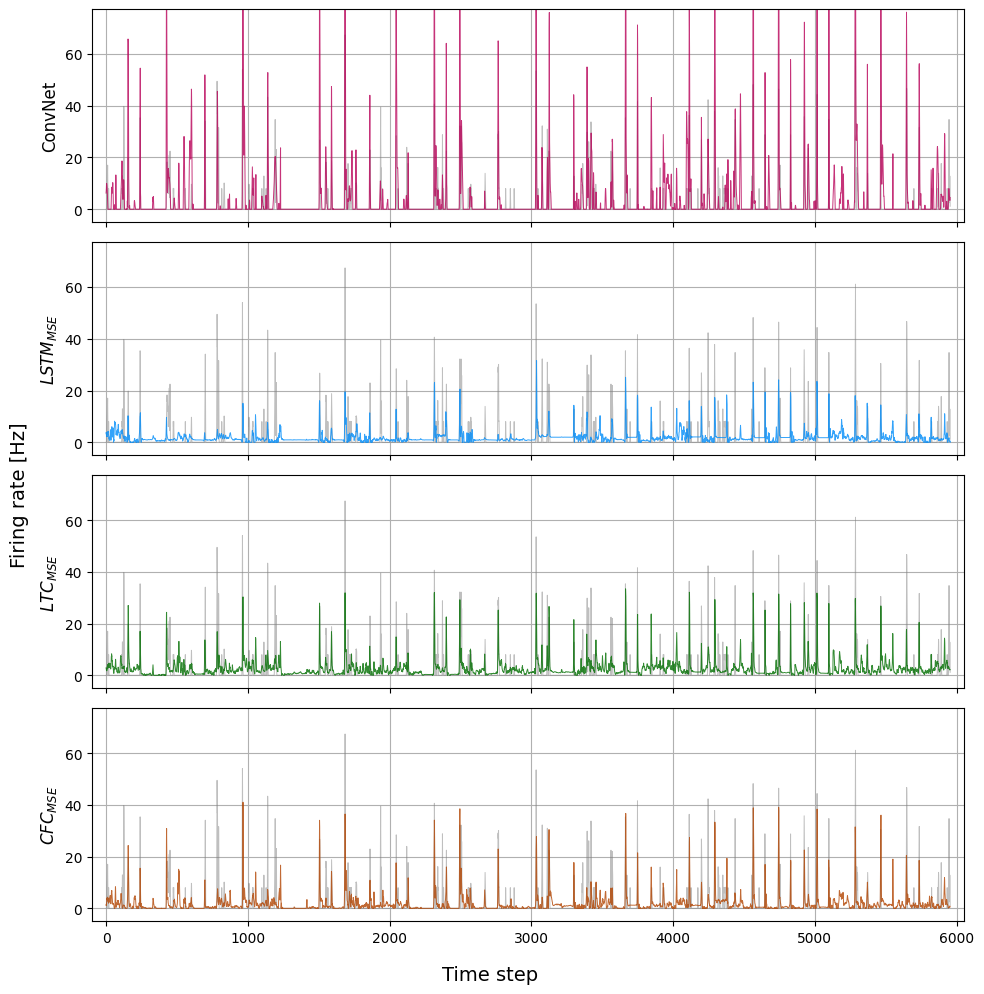

In [44]:
lstm = pd.read_csv("EXP_REG_SingleLSTM_40_mse_9_STEP_1_RUN_2.csv", sep=",")
cfc = pd.read_csv("EXP_REG_SimpleCFC_40_mse_9_STEP_1_RUN_3.csv", sep=",")
ltc = pd.read_csv("EXP_REG_SimpleLTC_40_mse_9_STEP_1_RUN_1.csv", sep=",")
convnet = pd.read_csv("EXP_REG_OgLinear_15x11_40_mse_9_STEP_1_RUN_4.csv", sep=",")

# apply max(0, x) to all predictions
lstm = lstm.clip(lower=0)
cfc = cfc.clip(lower=0)
ltc = ltc.clip(lower=0)
convnet = convnet.clip(lower=0)

targets = pd.read_csv("unscaled_targets.csv", sep=",")

predictions_list = [convnet, lstm, ltc, cfc]
model_names = ["ConvNet", "$LSTM_{MSE}$", "$LTC_{MSE}$", "$CFC_{MSE}$"]
selected_channels = [5]  # Example of selecting specific channels

visualize_model_predictions_comparison(
    targets=targets,
    predictions_list=predictions_list,
    model_names=model_names,
    plots_dir=Path("plots"),
    file_name="comparison.pdf",
    return_fig=False,
    selected_channels=selected_channels,  # Example of selecting specific channels
)

In [21]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def plot_model_correlations(
        base_corrs,
        separate_corrs,
        labels,
        plots_dir: Path = Path("plots"),
        base_color: tuple = (184, 0, 88),
        model_name: str = "ConvNet",
        file_name: str = "comparison.png",
        return_fig=False
):
    """
    Plots a comparison of correlation scores from a base model and separate models.

    Args:
        base_corrs (list of float): Correlations from the base model.
        separate_corrs (list of float): Correlations from models trained separately for each variable.
        labels (list of str): Labels for each variable (x-axis).
    """
    if not (len(base_corrs) == len(separate_corrs) == len(labels)):
        raise ValueError("All input lists must have the same length.")

    x = range(len(labels))

    plt.figure(figsize=(6, 5))

    # Plot base model as line with triangle markers
    base_color = tuple(c / 255 for c in base_color)  # Normalize to [0, 1] range
    plt.plot(x, base_corrs, marker='^', label=f'Base ${model_name}$', linestyle='-', color=base_color)

    # Plot separate model as scatter points
    plt.scatter(x, separate_corrs, label=f'Individual ${model_name}$ models', color='orange')

    # Set x-axis
    plt.xticks(x, labels, rotation=0, ha='center', fontsize=12)
    plt.xlabel('Ganglion cell', fontsize=14)

    # Set y-axis
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.01, 0.1), fontsize=12)
    plt.ylabel('Correlation $\\rho$', fontsize=14)

    plt.legend(loc="upper right", fontsize=12, ncol=2)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    # save the figure
    plt.savefig(plots_dir / file_name, dpi=300)
    plt.show()


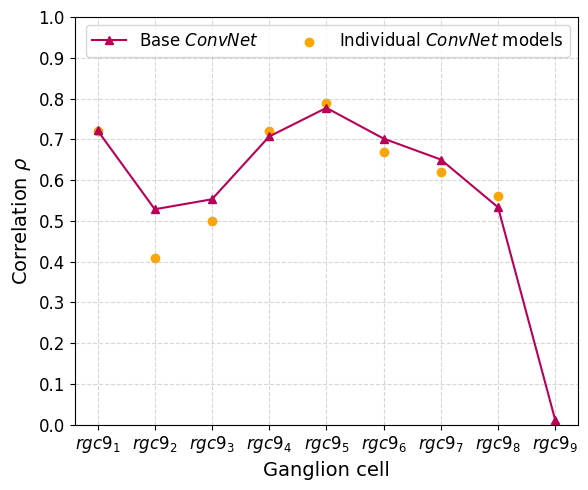

In [75]:
base = ["0.7218329230429703","0.5284627536335003","0.5529729176659157","0.7069401544364283","0.777119267581043","0.7016991771143929","0.6503657504986022","0.533147051450334","0.010838287356345502"]
base = [float(x) for x in base]
separate = [0.72, 0.41, 0.50, 0.72, 0.79, 0.67, 0.62, 0.56, 0.00]
variables = [f"$rgc9_{{{i+1}}}$" for i in range(len(base))]

plot_model_correlations(base, separate, variables, model_name="ConvNet", plots_dir=Path("plots"), file_name="correlation_comparison_ConvNet.pdf")

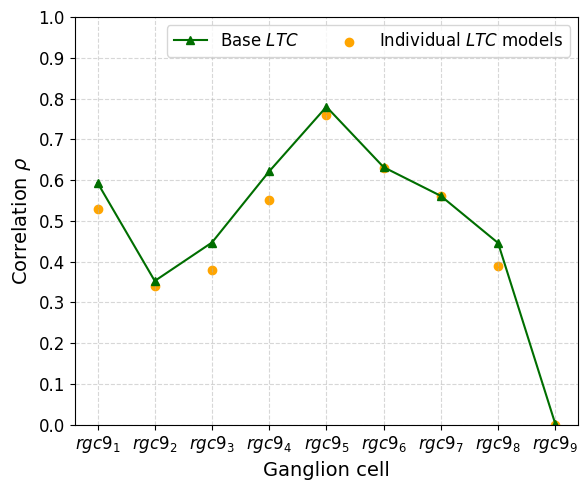

In [76]:
base = ["0.5933169571179526","0.35265092766810585","0.44691352429259024","0.6213298250322506","0.7797852232075463","0.6316355637630451","0.5611511275039769","0.4457291814538123","0.0019757756587762093"]
base = [float(x) for x in base]
separate = [0.53, 0.34, 0.38, 0.55, 0.76, 0.63, 0.56, 0.39, 0.00]
variables = [f"$rgc9_{{{i+1}}}$" for i in range(len(base))]

plot_model_correlations(base, separate, variables, model_name="LTC", plots_dir=Path("plots"), file_name="correlation_comparison_LTC.pdf", base_color=(0, 110, 0))

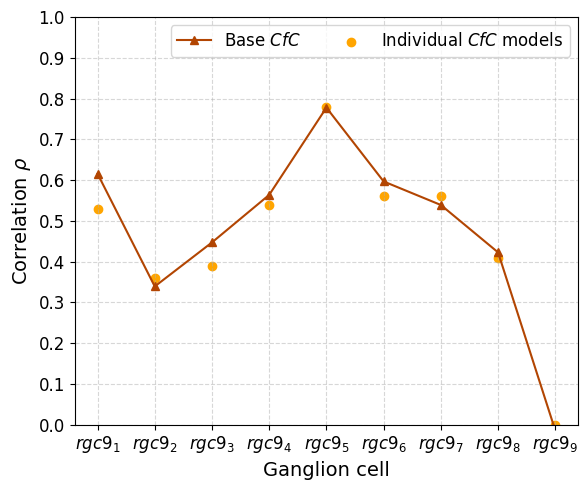

In [77]:
base = ["0.6155367768903012","0.3391708892170753","0.44711285734238326","0.5637530733175701","0.77773353679551","0.5966560818053174","0.5389356861311931","0.4226708387755109","-0.014064724847315153"]
base = [float(x) for x in base]
separate = [0.53,0.36,0.39,0.54,0.78,0.56,0.56,0.41,0.00]
variables = [f"$rgc9_{{{i+1}}}$" for i in range(len(base))]

plot_model_correlations(base, separate, variables, model_name="CfC", plots_dir=Path("plots"), file_name="correlation_comparison_CfC.pdf", base_color=(178, 69, 2))

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from typing import List

def plot_training_correlations(
    df_list: List[pd.DataFrame],
    model_names: List[str],
    colors: List[tuple],
    plots_dir: Path = Path("plots"),
    file_name: str = "training_corr_plot.png"
):
    """
    Plots training correlation over epochs for multiple models with min/max shading.

    Args:
        df_list (List[pd.DataFrame]): List of dataframes with training logs per model.
        model_names (List[str]): List of model names corresponding to each dataframe.
        colors (List[tuple]): List of RGB colors (0-255) for each model.
        plots_dir (Path): Directory to save the plot.
        file_name (str): Output file name for the saved plot.
    """
    if not (len(df_list) == len(model_names) == len(colors)):
        raise ValueError("All input lists must have the same length.")

    plots_dir.mkdir(parents=True, exist_ok=True)
    plt.figure(figsize=(6,6))

    for df, name, rgb in zip(df_list, model_names, colors):
        color = tuple(c / 255 for c in rgb)
        
        # Extract columns
        epochs = df["epoch"]
        mean_corr = df["Grouped runs - training/valid_metrics.PearsonCorrCoef"]
        min_corr = df["Grouped runs - training/valid_metrics.PearsonCorrCoef__MIN"]
        max_corr = df["Grouped runs - training/valid_metrics.PearsonCorrCoef__MAX"]
        
        # Plot mean line
        plt.plot(epochs, mean_corr, label=name, color=color, linewidth=2)

        # Fill between min and max
        plt.fill_between(
            epochs,
            min_corr,
            max_corr,
            color=color,
            alpha=0.3,
            linewidth=0
        )

    plt.xlim(0, 50)
    plt.ylim(0, 1)
    plt.xticks(np.arange(0, 51, 5), fontsize=12)
    plt.yticks(np.arange(0, 1.01, 0.1), fontsize=12)
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("Validation Correlation $\\rho$", fontsize=14)
    # plt.title("Validation Correlation over Epochs", fontsize=16)
    plt.legend(fontsize=12, loc="upper right", ncol=4)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    save_path = plots_dir / file_name
    plt.savefig(save_path, dpi=300)
    plt.show()

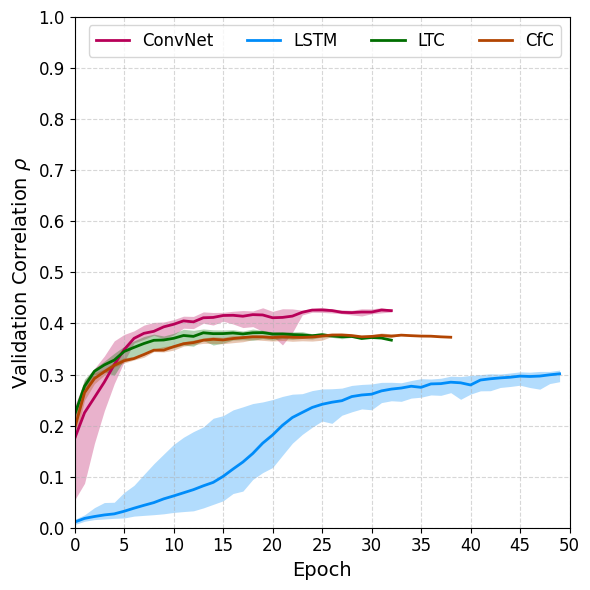

In [31]:
colors = [
    (184, 0, 88),  # ConvNet
    (0, 140, 249),  # LSTM
    (0, 110, 0),   # LTC
    (178, 69, 2),  # CfC
]

df_convnet = pd.read_csv("../VALID_RESULTS/base_regression/correlation_curves/convnet_27.csv", sep=",")
df_ltc = pd.read_csv("../VALID_RESULTS/base_regression/correlation_curves/ltc_27.csv", sep=",")
df_cfc = pd.read_csv("../VALID_RESULTS/base_regression/correlation_curves/cfc_27.csv", sep=",")
df_lstm = pd.read_csv("../VALID_RESULTS/base_regression/correlation_curves/lstm_27.csv", sep=",")

df_list = [df_convnet, df_lstm, df_ltc, df_cfc, ]
model_names = ["ConvNet", "LSTM", "LTC", "CfC", ]
plot_training_correlations(
    df_list=df_list,
    model_names=model_names,
    colors=colors,
    plots_dir=Path("plots"),
    file_name="training_correlation_plot_27.pdf"
)

In [8]:
import pandas as pd

df = pd.read_csv("unscaled_targets.csv", sep=",")
corr = df.corr()
# compute average correlation for each row
avg_corr = corr.mean(axis=1)
# sort by average correlation
avg_corr = avg_corr.sort_values(ascending=False)
# print the average correlation for each channel
for i, c in enumerate(avg_corr.index):
    print(f"Channel {i+1}: {avg_corr[c]:.2f}")

Channel 1: 0.29
Channel 2: 0.29
Channel 3: 0.28
Channel 4: 0.28
Channel 5: 0.27
Channel 6: 0.25
Channel 7: 0.18
Channel 8: 0.16
Channel 9: 0.11


In [12]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)
explained_variance = pca.explained_variance_ratio_
# print the explained variance for each principal component
for i, ev in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {ev:.2f}")

Principal Component 1: 0.43
Principal Component 2: 0.22
Principal Component 3: 0.09
Principal Component 4: 0.08
Principal Component 5: 0.07
Principal Component 6: 0.04
Principal Component 7: 0.04
Principal Component 8: 0.02
Principal Component 9: 0.02


# Loss curves

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.ticker as ticker

def plot_loss_curves_with_min_max(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    model_name: str,
    color: tuple,
    plots_dir: Path = Path("plots"),
    file_name: str = "loss_curve_plot.png"
):
    """
    Plots training and validation loss over epochs for a single model with min/max shading.

    Args:
        train_df (pd.DataFrame): DataFrame containing training loss data.
        valid_df (pd.DataFrame): DataFrame containing validation loss data.
        model_name (str): Name of the model for labeling.
        color (tuple): RGB color (0-255) for plotting.
        plots_dir (Path): Directory to save the plot.
        file_name (str): Output file name for the saved plot.
    """
    plots_dir.mkdir(parents=True, exist_ok=True)
    plt.figure(figsize=(6, 6))

    norm_color = tuple(c / 255 for c in color)

    # Extract epochs
    epochs = train_df["epoch"]

    # Training loss
    train_loss = train_df["Grouped runs - training/train_loss"]
    train_min = train_df["Grouped runs - training/train_loss__MIN"]
    train_max = train_df["Grouped runs - training/train_loss__MAX"]

    # Validation loss
    valid_loss = valid_df["Grouped runs - training/valid_loss"]
    valid_min = valid_df["Grouped runs - training/valid_loss__MIN"]
    valid_max = valid_df["Grouped runs - training/valid_loss__MAX"]

    # Plot training loss
    plt.plot(epochs, train_loss, label=f"{model_name} - Train", color="orange", linewidth=2)
    plt.fill_between(epochs, train_min, train_max, color="orange", alpha=0.3, linewidth=0)

    # Plot validation loss
    plt.plot(epochs, valid_loss, label=f"{model_name} - Validation", color="blue", linewidth=2)
    plt.fill_between(epochs, valid_min, valid_max, color="blue", alpha=0.15, linewidth=0)

    plt.xlim(0, 50)
    # plt.ylim(0.0, 1.0)
    plt.xticks(np.arange(0, 51, 5), fontsize=14)
    plt.yticks(fontsize=14)
    # plt.yticks(np.arange(0.0, 1.01, 0.1), fontsize=12)
    plt.xlabel("Epoch", fontsize=16)
    plt.ylabel("Loss", fontsize=16)
    plt.legend(fontsize=12, loc="upper right")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    save_path = plots_dir / file_name
    plt.savefig(save_path, dpi=300)
    plt.show()


In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
from pathlib import Path


def plot_loss_curves_with_min_max(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    model_name: str,
    color: tuple,
    plots_dir: Path = Path("plots"),
    file_name: str = "loss_curve_plot.png"
):
    """
    Plots training and validation loss over epochs for a single model with min/max shading.
    Ensures consistent y-axis formatting and spacing for LaTeX alignment.

    Args:
        train_df (pd.DataFrame): DataFrame containing training loss data.
        valid_df (pd.DataFrame): DataFrame containing validation loss data.
        model_name (str): Name of the model for labeling.
        color (tuple): RGB color (0-255) for plotting.
        plots_dir (Path): Directory to save the plot.
        file_name (str): Output file name for the saved plot.
    """
    plots_dir.mkdir(parents=True, exist_ok=True)
    fig, ax = plt.subplots(figsize=(6, 6))

    norm_color = tuple(c / 255 for c in color)

    # Extract epochs
    epochs = train_df["epoch"]

    # Training loss
    train_loss = train_df["Grouped runs - training/train_loss"]
    train_min = train_df["Grouped runs - training/train_loss__MIN"]
    train_max = train_df["Grouped runs - training/train_loss__MAX"]

    # Validation loss
    valid_loss = valid_df["Grouped runs - training/valid_loss"]
    valid_min = valid_df["Grouped runs - training/valid_loss__MIN"]
    valid_max = valid_df["Grouped runs - training/valid_loss__MAX"]

    # Plot training and validation loss
    ax.plot(epochs, train_loss, label=f"{model_name} - Train", color="orange", linewidth=2)
    ax.fill_between(epochs, train_min, train_max, color="orange", alpha=0.3)

    ax.plot(epochs, valid_loss, label=f"{model_name} - Validation", color="blue", linewidth=2)
    ax.fill_between(epochs, valid_min, valid_max, color="blue", alpha=0.15)

    # Axes formatting
    ax.set_xlim(0, 50)
    ax.set_xticks(np.arange(0, 51, 5))
    ax.tick_params(labelsize=14)

    ax.set_xlabel("Epoch", fontsize=16)
    ax.set_ylabel("Loss", fontsize=16)

    # === Scientific offset scale (e.g., ×10⁻²) with standard tick formatting ===
    scalar_formatter = ticker.ScalarFormatter(useMathText=True)
    scalar_formatter.set_powerlimits((0, 0))  # always use scientific offset
    scalar_formatter.set_scientific(True)
    scalar_formatter.format_data = lambda x: f"{x:.1f}"  # override for 1 decimal tick labels
    ax.yaxis.set_major_formatter(scalar_formatter)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

    # Reserve fixed space on left for y-axis
    fig.subplots_adjust(left=0.2)

    ax.legend(fontsize=12, loc="upper right")
    ax.grid(True, linestyle='--', alpha=0.5)

    save_path = plots_dir / file_name
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()


In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
from pathlib import Path


class CustomScientificFormatter(ticker.ScalarFormatter):
    def __init__(self, fmt="%1.1e", useMathText=True, **kwargs):
        super().__init__(useMathText=useMathText, **kwargs)
        self.fmt = fmt

    def _set_format(self):
        self.format = self.fmt


def plot_loss_curves_with_min_max(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    model_name: str,
    color: tuple,
    plots_dir: Path = Path("plots"),
    file_name: str = "loss_curve_plot.png"
):
    """
    Plots training and validation loss over epochs for a single model with min/max shading.
    Ensures consistent y-axis formatting and spacing for LaTeX alignment.

    Args:
        train_df (pd.DataFrame): DataFrame containing training loss data.
        valid_df (pd.DataFrame): DataFrame containing validation loss data.
        model_name (str): Name of the model for labeling.
        color (tuple): RGB color (0-255) for plotting.
        plots_dir (Path): Directory to save the plot.
        file_name (str): Output file name for the saved plot.
    """
    plots_dir.mkdir(parents=True, exist_ok=True)
    fig, ax = plt.subplots(figsize=(6, 6))

    norm_color = tuple(c / 255 for c in color)

    # Extract epochs
    epochs = train_df["epoch"]

    # Training loss
    train_loss = train_df["Grouped runs - training/train_loss"]
    train_min = train_df["Grouped runs - training/train_loss__MIN"]
    train_max = train_df["Grouped runs - training/train_loss__MAX"]

    # Validation loss
    valid_loss = valid_df["Grouped runs - training/valid_loss"]
    valid_min = valid_df["Grouped runs - training/valid_loss__MIN"]
    valid_max = valid_df["Grouped runs - training/valid_loss__MAX"]

    # Plot training and validation loss
    ax.plot(epochs, train_loss, label=f"{model_name} - Train", color="orange", linewidth=2)
    ax.fill_between(epochs, train_min, train_max, color="orange", alpha=0.3)

    ax.plot(epochs, valid_loss, label=f"{model_name} - Validation", color="blue", linewidth=2)
    ax.fill_between(epochs, valid_min, valid_max, color="blue", alpha=0.15)

    # Axes formatting
    ax.set_xlim(0, 50)
    ax.set_xticks(np.arange(0, 51, 5))
    ax.tick_params(labelsize=14)

    ax.set_xlabel("Epoch", fontsize=16)
    ax.set_ylabel("Loss", fontsize=16)

    # Use custom scientific formatter with 1 decimal place
    sci_formatter = CustomScientificFormatter(fmt="%1.1e")
    ax.yaxis.set_major_formatter(sci_formatter)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

    # Reserve fixed space on left for y-axis
    fig.subplots_adjust(left=0.2)

    ax.legend(fontsize=12, loc="upper right")
    ax.grid(True, linestyle='--', alpha=0.5)

    save_path = plots_dir / file_name
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

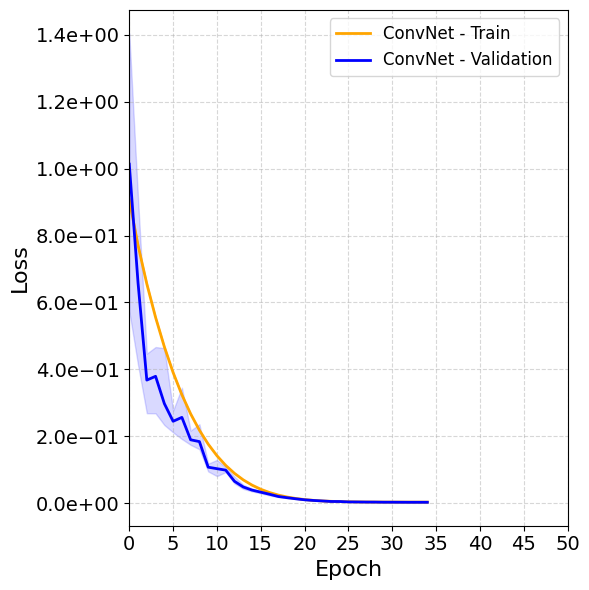

In [39]:
train_df = pd.read_csv("../VALID_RESULTS/base_regression/loss_curves/ConvNet_train.csv", sep=",")
valid_df = pd.read_csv("../VALID_RESULTS/base_regression/loss_curves/ConvNet_valid.csv", sep=",")

plot_loss_curves_with_min_max(
    train_df=train_df,
    valid_df=valid_df,
    model_name="ConvNet",
    color=(184, 0, 88),
    plots_dir=Path("plots"),
    file_name="convnet_loss_curve.pdf"
)

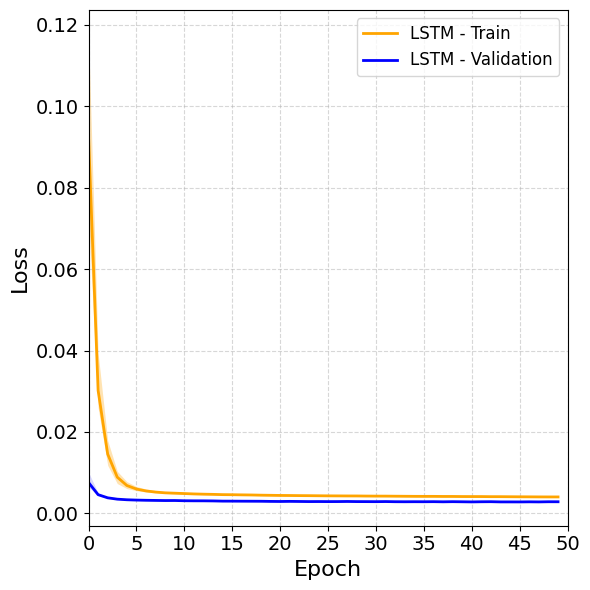

In [36]:
train_df = pd.read_csv("../VALID_RESULTS/base_regression/loss_curves/LSTM_train.csv", sep=",")
valid_df = pd.read_csv("../VALID_RESULTS/base_regression/loss_curves/LSTM_valid.csv", sep=",")

plot_loss_curves_with_min_max(
    train_df=train_df,
    valid_df=valid_df,
    model_name="LSTM",
    color=(184, 0, 88),
    plots_dir=Path("plots"),
    file_name="LSTM_loss_curve.pdf"
)

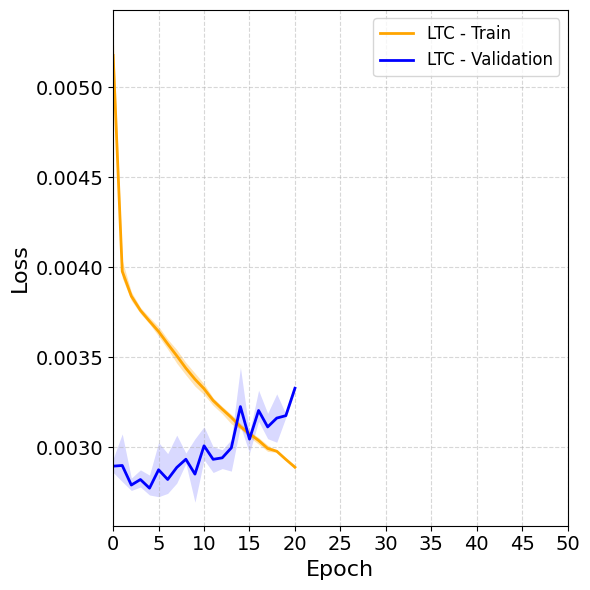

In [37]:
train_df = pd.read_csv("../VALID_RESULTS/base_regression/loss_curves/LTC_train.csv", sep=",")
valid_df = pd.read_csv("../VALID_RESULTS/base_regression/loss_curves/LTC_valid.csv", sep=",")

plot_loss_curves_with_min_max(
    train_df=train_df,
    valid_df=valid_df,
    model_name="LTC",
    color=(184, 0, 88),
    plots_dir=Path("plots"),
    file_name="LTC_loss_curve.pdf"
)

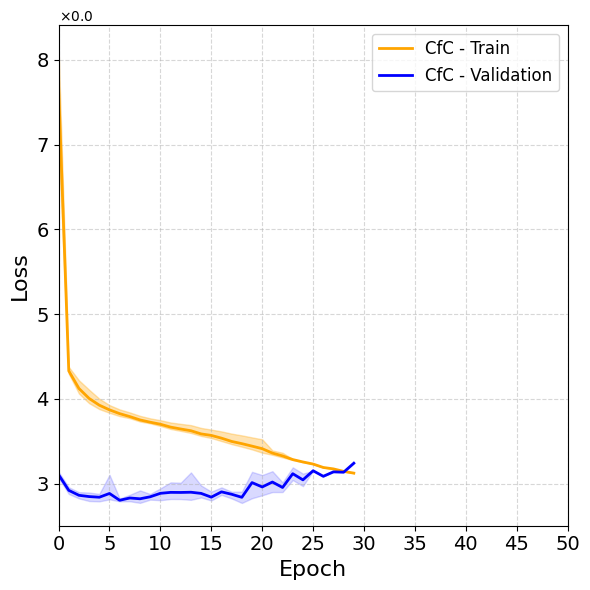

In [33]:
model = "CfC"
train_df = pd.read_csv(f"../VALID_RESULTS/base_regression/loss_curves/{model}_train.csv", sep=",")
valid_df = pd.read_csv(f"../VALID_RESULTS/base_regression/loss_curves/{model}_valid.csv", sep=",")

plot_loss_curves_with_min_max(
    train_df=train_df,
    valid_df=valid_df,
    model_name=model,
    color=(184, 0, 88),
    plots_dir=Path("plots"),
    file_name=f"{model}_loss_curve.pdf"
)

train_df = pd.read